# Beijing Air Quality Forecasting Starter Notebook

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf

In [16]:
import pandas as pd
import os

# Define the path to your Downloads folder
downloads_path = os.path.expanduser("C:\\Users\\HP\\Downloads\\alu-jan25-air-quality-forecasting")

# Load datasets from Downloads
train_path = os.path.join("C:\\Users\\HP\\Downloads\\alu-jan25-air-quality-forecasting", "train.csv")
test_path = os.path.join("C:\\Users\\HP\\Downloads\\alu-jan25-air-quality-forecasting", "test.csv")

# Read CSV files
train_df = pd.read_csv("C:\\Users\\HP\Downloads\\alu-jan25-air-quality-forecasting\\train.csv")
test_df = pd.read_csv("C:\\Users\\HP\\Downloads\\alu-jan25-air-quality-forecasting\\test.csv")




# Explore the training data

In this sections explore your dataset with appropiate statistics and visualisations to understand your better. Ensure that you explain output of every code cell and what it entails.

In [17]:
# Inspecting the first few rows of the dataset to understand its structure.
print("Training Data Overview:")

# Display first few rows
print(train_df.head())
print(test_df.head())

Training Data Overview:
   No      DEWP      TEMP      PRES       Iws        Is        Ir  \
0   1 -1.580878 -1.922250  0.443328 -0.441894 -0.069353 -0.137667   
1   2 -1.580878 -2.004228  0.345943 -0.379306 -0.069353 -0.137667   
2   3 -1.580878 -1.922250  0.248559 -0.343514 -0.069353 -0.137667   
3   4 -1.580878 -2.168183  0.248559 -0.280926 -0.069353 -0.137667   
4   5 -1.511594 -2.004228  0.151174 -0.218339 -0.069353 -0.137667   

              datetime   cbwd_NW   cbwd_SE   cbwd_cv  pm2.5  
0  2010-01-01 00:00:00  1.448138 -0.732019 -0.522096    NaN  
1  2010-01-01 01:00:00  1.448138 -0.732019 -0.522096    NaN  
2  2010-01-01 02:00:00  1.448138 -0.732019 -0.522096    NaN  
3  2010-01-01 03:00:00  1.448138 -0.732019 -0.522096    NaN  
4  2010-01-01 04:00:00  1.448138 -0.732019 -0.522096    NaN  
      No      DEWP      TEMP      PRES       Iws        Is        Ir  \
0  30677  1.190496  0.701029 -2.186052 -0.003982 -0.069353 -0.137667   
1  30678  1.121211  0.619051 -2.186052  0.031

In [18]:
print(train_df.columns)


Index(['No', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'datetime', 'cbwd_NW',
       'cbwd_SE', 'cbwd_cv', 'pm2.5'],
      dtype='object')


In [19]:
# Ensure the dataset is loaded correctly
import pandas as pd

# Convert 'datetime' column to datetime format
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
test_df['datetime'] = pd.to_datetime(test_df['datetime'])

# Set 'datetime' column as the index
train_df.set_index('datetime', inplace=True)
test_df.set_index('datetime', inplace=True)

# Display the first few rows to confirm changes
print(train_df.head())
print(test_df.head())



                     No      DEWP      TEMP      PRES       Iws        Is  \
datetime                                                                    
2010-01-01 00:00:00   1 -1.580878 -1.922250  0.443328 -0.441894 -0.069353   
2010-01-01 01:00:00   2 -1.580878 -2.004228  0.345943 -0.379306 -0.069353   
2010-01-01 02:00:00   3 -1.580878 -1.922250  0.248559 -0.343514 -0.069353   
2010-01-01 03:00:00   4 -1.580878 -2.168183  0.248559 -0.280926 -0.069353   
2010-01-01 04:00:00   5 -1.511594 -2.004228  0.151174 -0.218339 -0.069353   

                           Ir   cbwd_NW   cbwd_SE   cbwd_cv  pm2.5  
datetime                                                            
2010-01-01 00:00:00 -0.137667  1.448138 -0.732019 -0.522096    NaN  
2010-01-01 01:00:00 -0.137667  1.448138 -0.732019 -0.522096    NaN  
2010-01-01 02:00:00 -0.137667  1.448138 -0.732019 -0.522096    NaN  
2010-01-01 03:00:00 -0.137667  1.448138 -0.732019 -0.522096    NaN  
2010-01-01 04:00:00 -0.137667  1.448138 -0.732

# Handle missing values


- Check the dataset for missing values and decide how to handle them.
- In this example, missing values are filled with the mean. You can experiment with other strategies.

In [20]:
# Check for missing values before filling
print("Missing values before filling:")
print(train_df.isnull().sum())
print(test_df.isnull().sum())

# Fill missing values with column mean
train_df.fillna(train_df.mean(), inplace=True)
test_df.fillna(test_df.mean(), inplace=True)

# Verify that missing values are handled
print("Missing values after filling:")
print(train_df.isnull().sum())
print(test_df.isnull().sum())



Missing values before filling:
No            0
DEWP          0
TEMP          0
PRES          0
Iws           0
Is            0
Ir            0
cbwd_NW       0
cbwd_SE       0
cbwd_cv       0
pm2.5      1921
dtype: int64
No         0
DEWP       0
TEMP       0
PRES       0
Iws        0
Is         0
Ir         0
cbwd_NW    0
cbwd_SE    0
cbwd_cv    0
dtype: int64
Missing values after filling:
No         0
DEWP       0
TEMP       0
PRES       0
Iws        0
Is         0
Ir         0
cbwd_NW    0
cbwd_SE    0
cbwd_cv    0
pm2.5      0
dtype: int64
No         0
DEWP       0
TEMP       0
PRES       0
Iws        0
Is         0
Ir         0
cbwd_NW    0
cbwd_SE    0
cbwd_cv    0
dtype: int64


# Separate features and target

- Feel free to trop any non-essential columns like that you think might not contribute to modeling.

In [21]:
X_train = train_df.drop(columns=['pm2.5', 'no'], errors='ignore')
y_train = train_df['pm2.5']
print(f"Final X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")






Final X_train shape: (30676, 10), y_train shape: (30676,)


In [22]:
# Reshape data for LSTM input
# LSTM models require data in the shape (samples, timesteps, features).
# Here, the data is reshaped to add a "timesteps" dimension.
import numpy as np

# Define function to create sequences for LSTM
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])  # Past `seq_length` timesteps
        y.append(target[i + seq_length])  # Target at next timestep
    return np.array(X), np.array(y)

# Define sequence length (e.g., past 24 time steps)
SEQ_LENGTH = 24  

# Check if X_train is already a NumPy array
if isinstance(X_train, np.ndarray):
    X_train_array = X_train  # Already an array, no need to convert
else:
    X_train_array = X_train.to_numpy()

# Check if y_train is already a NumPy array
if isinstance(y_train, np.ndarray):
    y_train_array = y_train
else:
    y_train_array = y_train.to_numpy()

# Create LSTM-ready sequences
X_train_seq, y_train_seq = create_sequences(X_train_array, y_train_array, SEQ_LENGTH)

# Print the new shape to verify correctness
print(f"X_train shape: {X_train_seq.shape}")  # Expected: (samples, timesteps=24, features)
print(f"y_train shape: {y_train_seq.shape}")  # Expected: (samples,)


X_train shape: (30652, 24, 10)
y_train shape: (30652,)


# Build model

Below is a simple LSTM model. Your task is to experiment with different parameters like, numbers of layers, units, activation functions, and optimizers, etc to get the best performing model. Experiment with other optimizers (e.g., SGD) or hyperparameters to improve performance.

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf

# Define the LSTM model
model = Sequential([
    LSTM(32, activation='relu', input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dense(1)  # Output layer for single prediction (PM2.5)
])

# Compile the model with proper RMSE metric
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")]  # RMSE as a built-in metric
)

# Display the model architecture
model.summary()



C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,537 (21.63 KB)

 Trainable params: 5,537 (21.63 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(
    X_train_seq, y_train_seq,  # Ensure these variables are properly defined
    epochs=10,                 
    batch_size=32,             
    validation_split=0.2,      
    verbose=1                  
)




Epoch 1/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 5418345.5000 - rmse: 2041.3705 - val_loss: 13312.8838 - val_rmse: 115.3815
Epoch 2/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 10091.3574 - rmse: 100.4426 - val_loss: 12943.4521 - val_rmse: 113.7693
Epoch 3/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 10211.6953 - rmse: 101.0436 - val_loss: 14725.0879 - val_rmse: 121.3470
Epoch 4/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 10083.3633 - rmse: 100.3968 - val_loss: 13144.1113 - val_rmse: 114.6478
Epoch 5/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 10298.5068 - rmse: 101.4675 - val_loss: 12189.8066 - val_rmse: 110.4075
Epoch 6/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 10199.1816 - rmse: 100.9829 - val_loss: 45633.8438 - val_rmse: 213.6208
Epoch 7/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 200321.6250 - rmse: 397.8357 - val_loss: 13194.4717 - val_rmse: 114.8672
Epoch 8/10
767/767 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 10180.0400 -

958/958 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


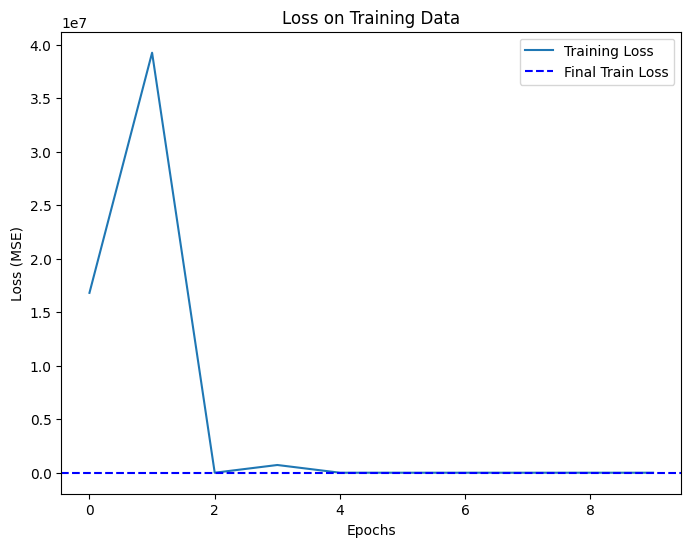

Final Training Loss (MSE): 10352.496583515329


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure model is trained before making predictions
train_predictions = # Prepare the test data
X_test = test.drop(['No'], axis=1)
X_test = np.expand_dims(X_test, axis=1)

# Make predictions on the test set using trained model to predict "pm2.5" concentrations
predictions = model.predict(X_test)

# Ensure predictions do not contain NaN values
predictions = np.nan_to_num(predictions)

# Convert predictions to integers
predictions = np.round(predictions).astype(int)

# Prepare the submission file
# Convert 'row ID' index to string and remove leading zeros for single-digit hours
submission = pd.DataFrame({
    'row ID': pd.to_datetime(test.index).strftime('%Y-%m-%d %-H:%M:%S'),  # Remove leading zeros for hours
    'pm2.5': predictions.flatten()
})

# Sort the submission by 'row ID' to match the solution file exactly
submission = submission.sort_values(by='row ID')

# Save the file in CSV format for submission on Kaggle
submission.to_csv('/content/drive/MyDrive/air_quality_forcasting/subm_fixed_13.csv', index=False)(X_train_seq)  # Use the correct sequence data
train_loss = np.mean((y_train_seq - train_predictions.flatten())**2)  # Compute MSE

# Plot training loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')  # Training loss during epochs
plt.axhline(y=train_loss, color='blue', linestyle='--', label='Final Train Loss')  # Final training loss
plt.title('Loss on Training Data')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

print(f"Final Training Loss (MSE): {train_loss}")


In [1]:

# Prepare the test data
X_test = test.drop(['No'], axis=1)
X_test = np.expand_dims(X_test, axis=1)

# Make predictions on the test set using trained model to predict "pm2.5" concentrations
predictions = model.predict(X_test)

# Ensure predictions do not contain NaN values
predictions = np.nan_to_num(predictions)

# Convert predictions to integers
predictions = np.round(predictions).astype(int)

# Prepare the submission file
# Convert 'row ID' index to string and remove leading zeros for single-digit hours
submission = pd.DataFrame({
    'row ID': pd.to_datetime(test.index).strftime('%Y-%m-%d %-H:%M:%S'),  # Remove leading zeros for hours
    'pm2.5': predictions.flatten()
})

# Sort the submission by 'row ID' to match the solution file exactly
submission = submission.sort_values(by='row ID')

# Save the file in CSV format for submission on Kaggle
submission.to_csv('/content/drive/MyDrive/air_quality_forcasting/subm_fixed_13.csv', index=False)





















FileNotFoundError: [Errno 2] No such file or directory: 'your_dataset.csv'